In [4]:
import numpy as np
from PIL import Image

def upscale_image(image, scale_factor):
    # Convert the image to a PIL image
    pil_image = Image.fromarray(image)
    
    # Calculate the new size
    new_size = (int(pil_image.width * scale_factor), int(pil_image.height * scale_factor))
    
    # Resize the image using bicubic interpolation
    upscaled_pil_image = pil_image.resize(new_size, Image.BICUBIC)
    
    # Convert the PIL image back to a NumPy array
    upscaled_image = np.array(upscaled_pil_image)
    
    return upscaled_image

number of lines found:  7


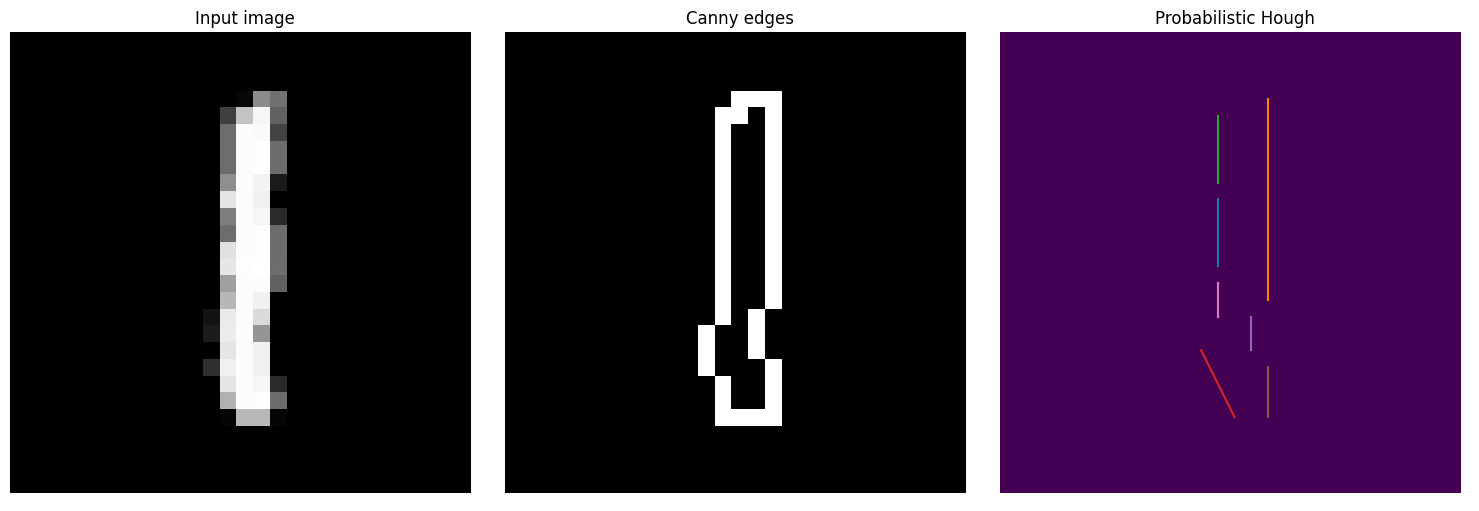

In [37]:
#!pip install scikit-image

import matplotlib.pyplot as plt
#from skimage.transform import probabilistic_hough_line
from matplotlib import cm
import cv2 as cv

from edge_detection import get_mnist_image, extract_edges #,upscale_image
import numpy as np
import cv2

def probabilistic_hough_line(edges, threshold, line_length, line_gap):
   return cv.HoughLinesP(edges, 1, np.pi / 180, threshold, minLineLength=line_length, maxLineGap=line_gap)

# Line finding using the Probabilistic Hough Transform
#np.random.seed(42)
(img, y) = get_mnist_image()
img = img.reshape(28, 28)
edges = extract_edges(img)

scale_factor = 1  # Increase the resolution by a factor of 2

# Bicubic Interpolation
upscaled_bicubic = upscale_image(edges, scale_factor)
lines = probabilistic_hough_line(upscaled_bicubic, threshold=4, line_length=2, line_gap=1)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(upscaled_bicubic, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
print("number of lines found: ", len(lines))
for line in lines:
    x1, y1, x2, y2 = line[0]
    ax[2].plot((x1, x2), (y1, y2))
ax[2].set_xlim((0, img.shape[1]))
ax[2].set_ylim((img.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from PIL import Image

def probabilistic_hough_line(edges, threshold, line_length, line_gap):
   return cv.HoughLinesP(edges, 1, np.pi / 180, threshold, minLineLength=line_length, maxLineGap=line_gap)

def upscale_image(image, scale_factor):
    pil_image = Image.fromarray(image)
    new_size = (int(pil_image.width * scale_factor), int(pil_image.height * scale_factor))
    upscaled_pil_image = pil_image.resize(new_size, Image.BICUBIC)
    upscaled_image = np.array(upscaled_pil_image)
    return upscaled_image

def display_lines(threshold, line_length, line_gap):
    # Example usage
    # Line finding using the Probabilistic Hough Transform
    np.random.seed(9)
    (img, y) = get_mnist_image()
    img = img.reshape(28, 28)
    edges = extract_edges(img)

    scale_factor = 1  # Increase the resolution by a factor of 2

    # Bicubic Interpolation
    upscaled_bicubic = upscale_image(edges, scale_factor)
    lines = probabilistic_hough_line(upscaled_bicubic, threshold, line_length, line_gap)

    # Generating figure 2
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(img, cmap=cm.gray)
    ax[0].set_title('Input image')

    ax[1].imshow(upscaled_bicubic, cmap=cm.gray)
    ax[1].set_title('Canny edges')

    ax[2].imshow(edges * 0)
    print("number of lines found: ", len(lines))
    for line in lines:
        x1, y1, x2, y2 = line[0]
        ax[2].plot((x1, x2), (y1, y2))
    ax[2].set_xlim((0, img.shape[1]))
    ax[2].set_ylim((img.shape[0], 0))
    ax[2].set_title('Probabilistic Hough')

    for a in ax:
        a.set_axis_off()

    plt.tight_layout()
    plt.show()

# Create interactive sliders
interact(display_lines,
         threshold=IntSlider(min=4, max=4, step=1, value=10, description='Threshold'),
         line_length=IntSlider(min=2, max=2, step=1, value=10, description='Line Length'),
         line_gap=IntSlider(min=1, max=1, step=1, value=10, description='Line Gap'))

# THRESHOLD: 4
# LINE LENGTH: 2
# LINE GAP: 1

interactive(children=(IntSlider(value=4, description='Threshold', max=4, min=4), IntSlider(value=2, descriptio…

<function __main__.display_lines(threshold, line_length, line_gap)>

number of lines found:  18


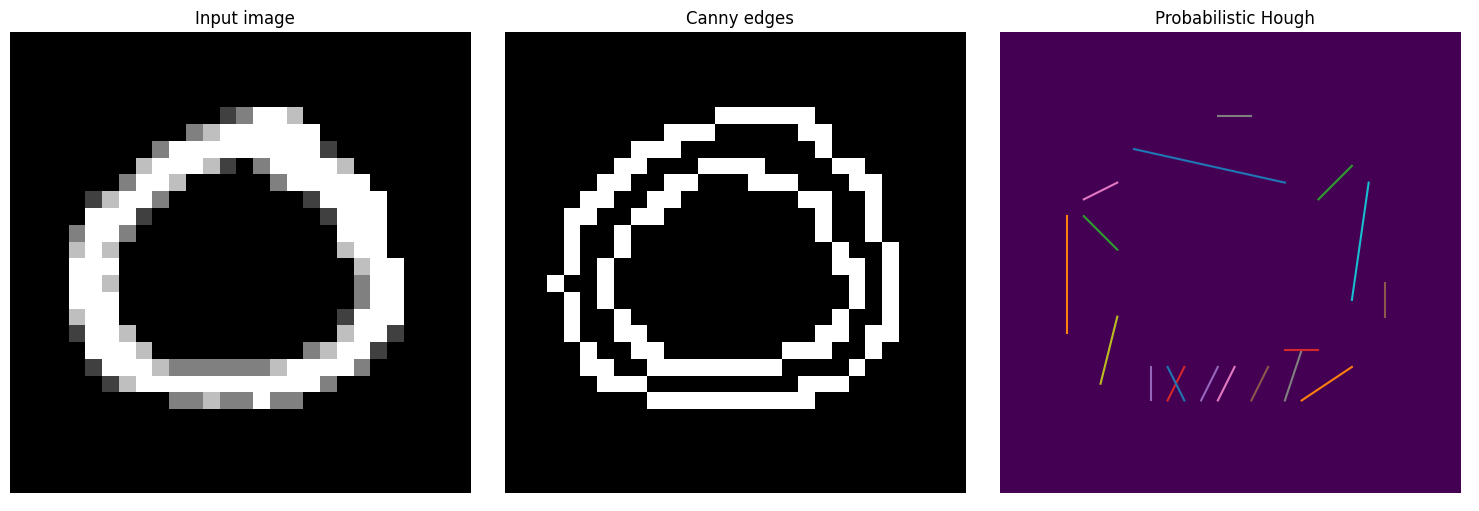

number of lines found:  7


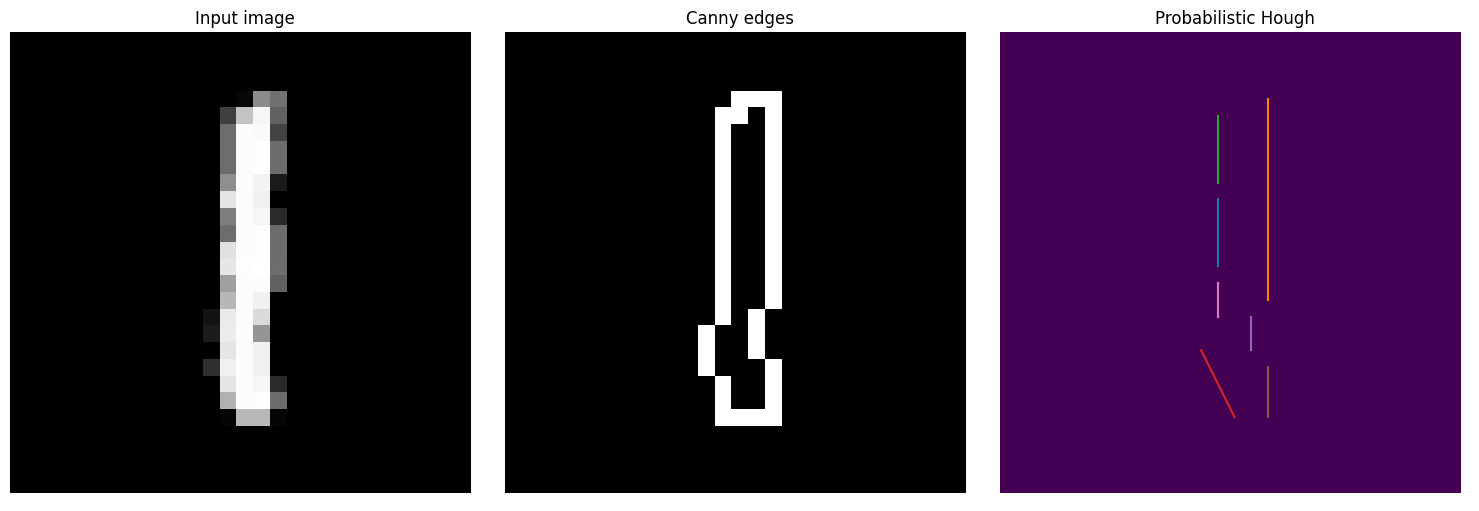

number of lines found:  16


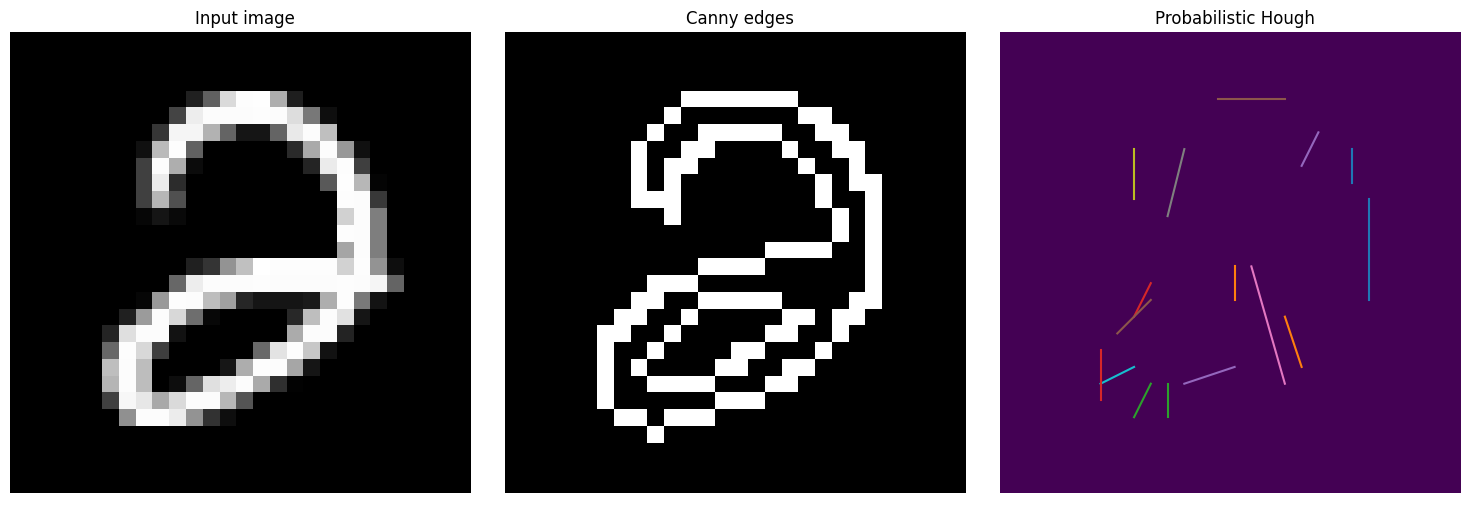

number of lines found:  17


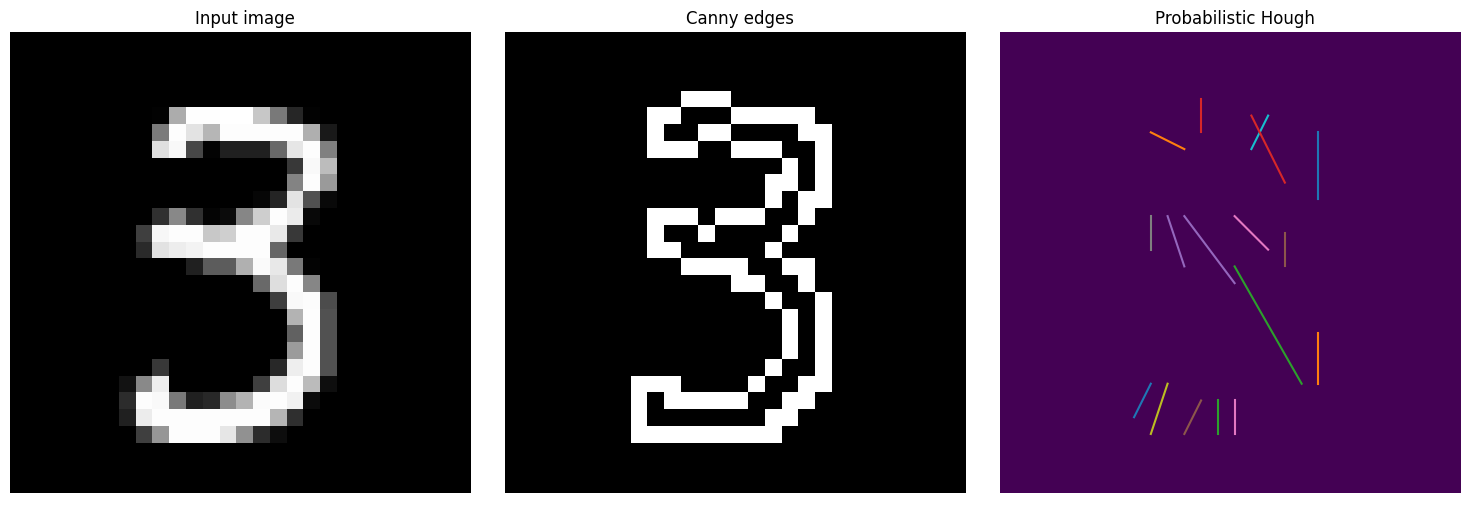

number of lines found:  13


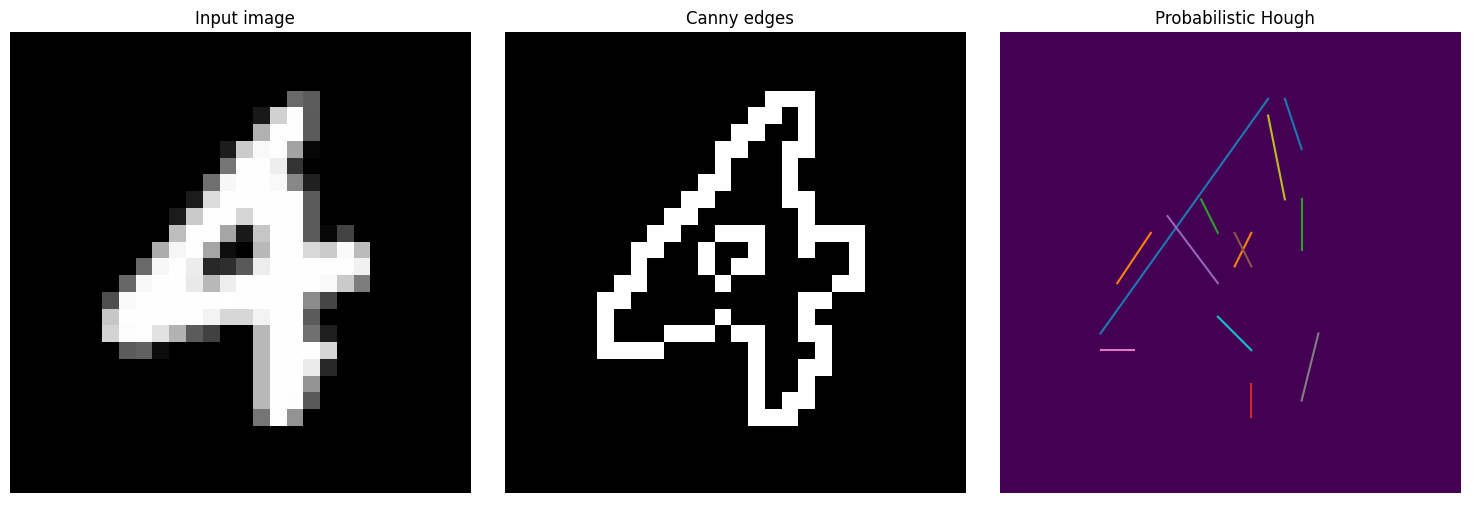

number of lines found:  11


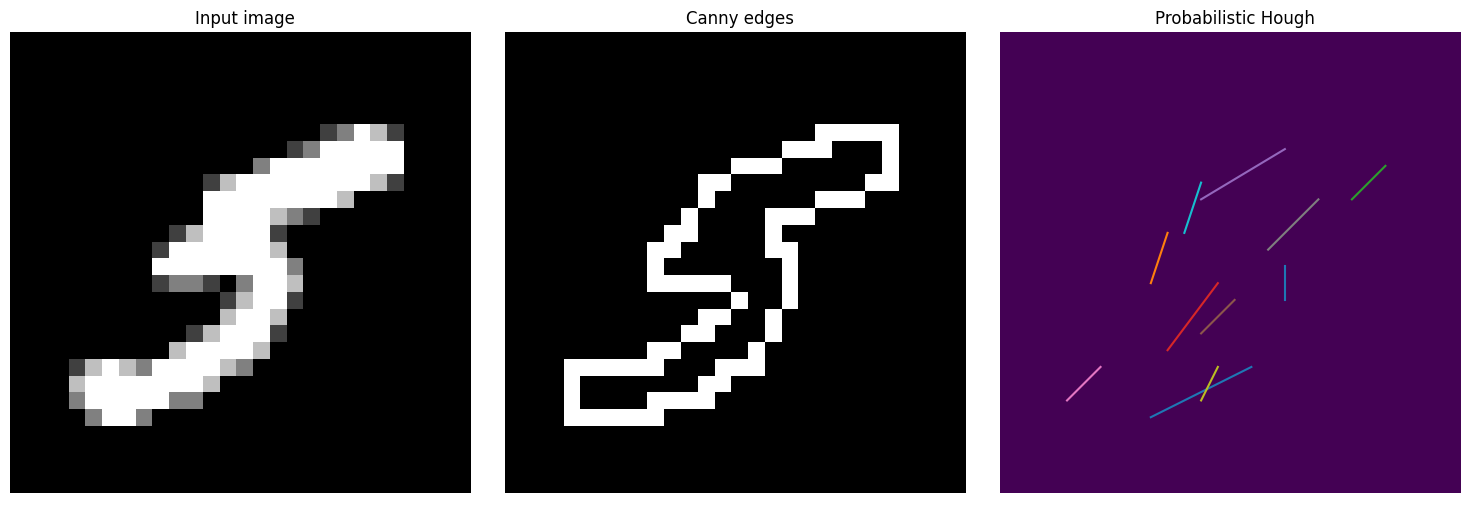

number of lines found:  12


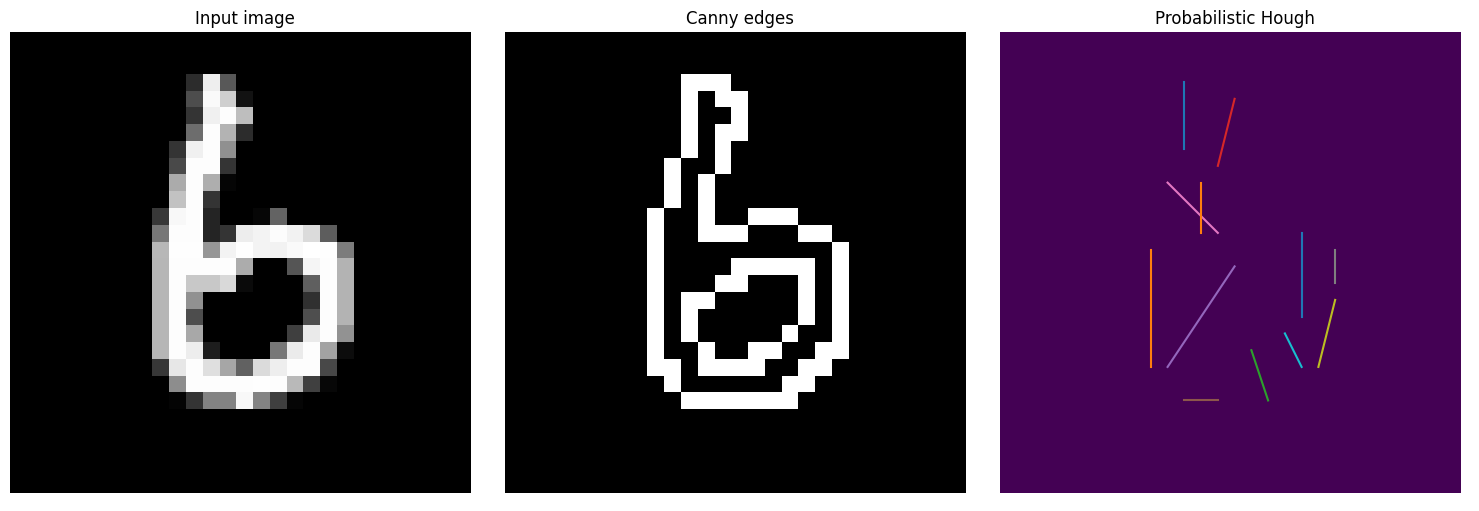

number of lines found:  6


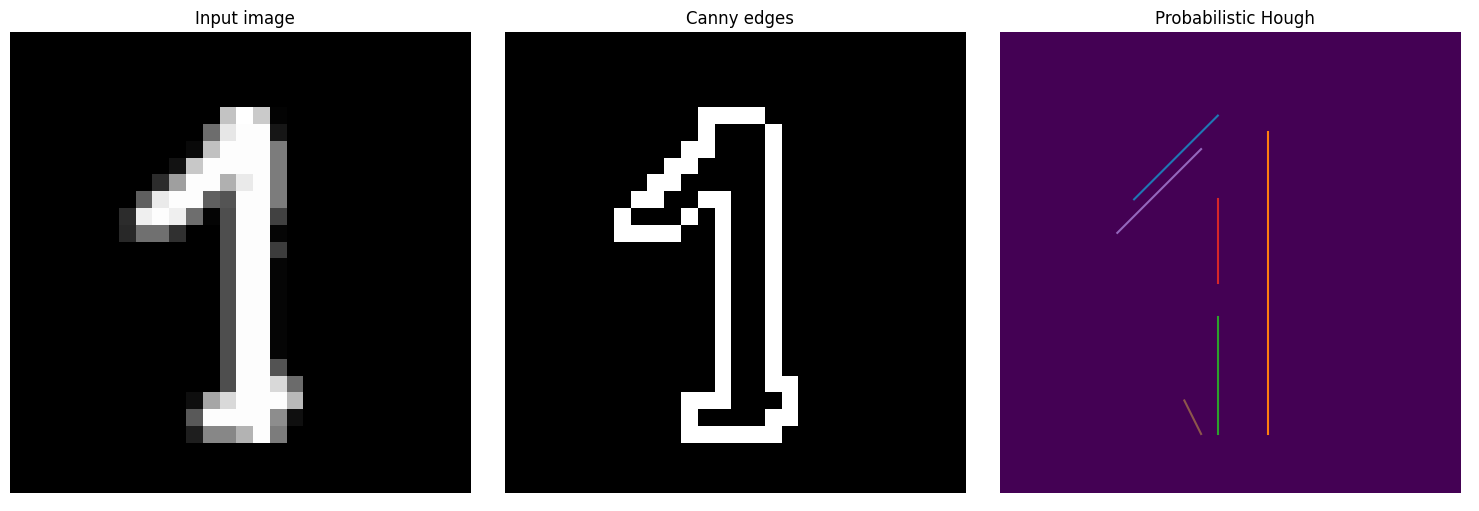

number of lines found:  18


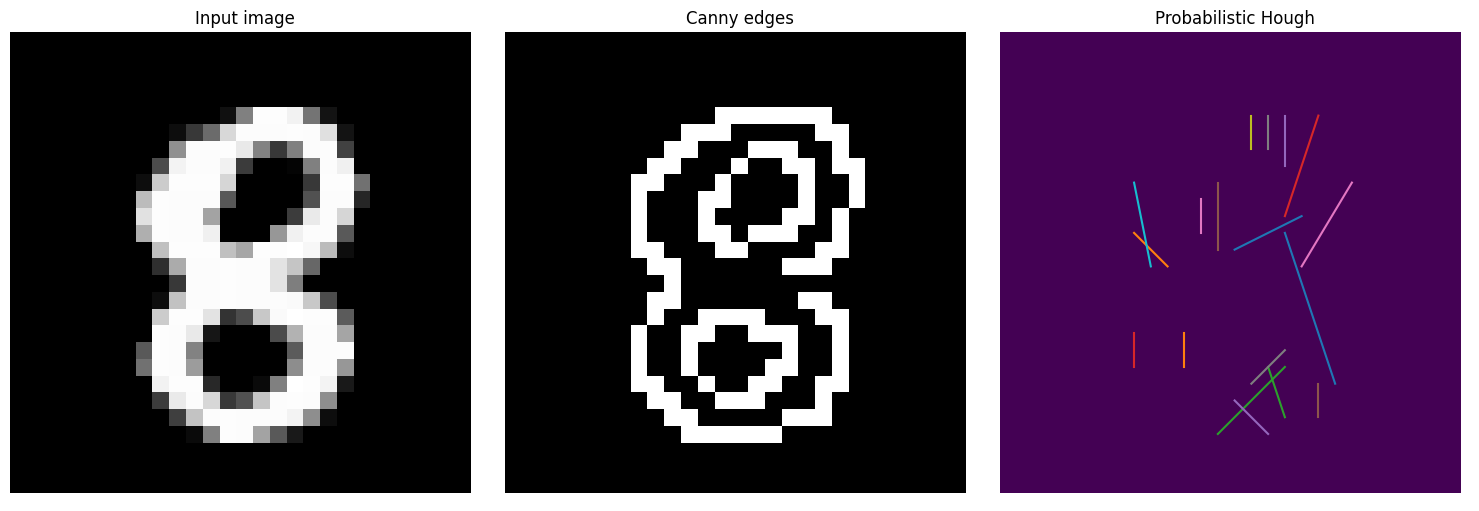

number of lines found:  22


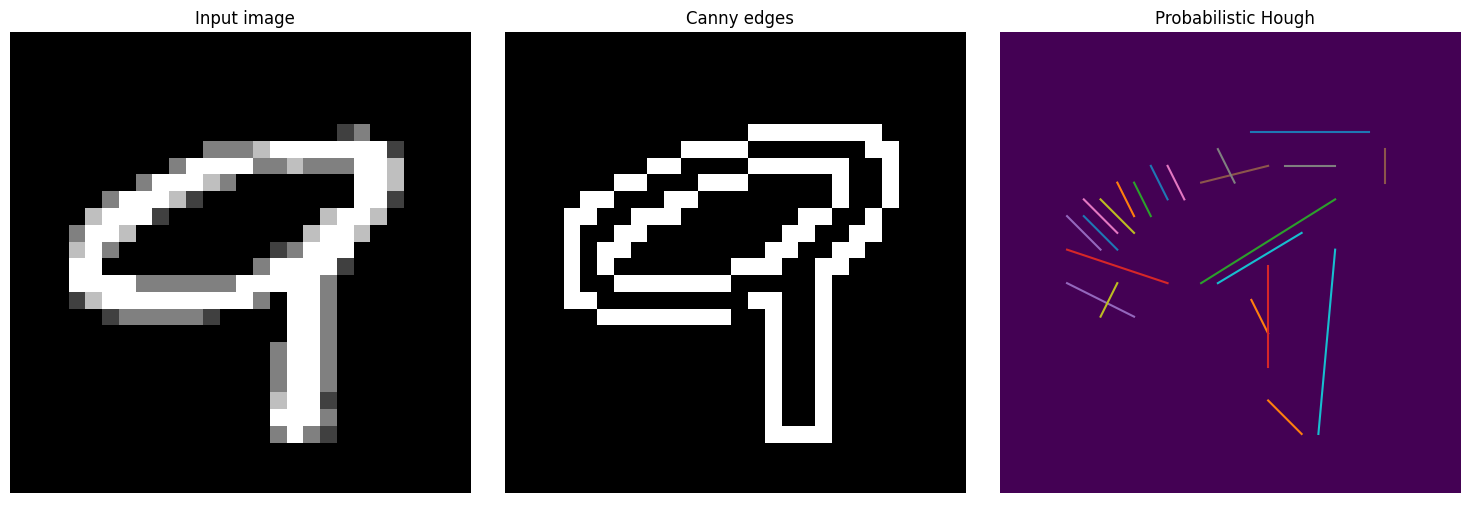

In [39]:
def display_lines_for_label(label=None, threshold=4, line_length=2, line_gap=1, scale_factor=1):
    while True:
        (img, y) = get_mnist_image()
        if y == label:
            break
    #(img, y) = get_mnist_image(label)
    img = img.reshape(28, 28)
    edges = extract_edges(img)

    # Bicubic Interpolation
    upscaled_bicubic = upscale_image(edges, scale_factor)
    lines = probabilistic_hough_line(upscaled_bicubic, threshold, line_length, line_gap)

    # Generating figure 2
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(img, cmap=cm.gray)
    ax[0].set_title('Input image')

    ax[1].imshow(upscaled_bicubic, cmap=cm.gray)
    ax[1].set_title('Canny edges')

    ax[2].imshow(edges * 0)
    print("label: ", y) 
    print("number of lines found: ", len(lines))
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            ax[2].plot((x1, x2), (y1, y2))
    ax[2].set_xlim((0, img.shape[1]))
    ax[2].set_ylim((img.shape[0], 0))
    ax[2].set_title('Probabilistic Hough')

    for a in ax:
        a.set_axis_off()

    plt.tight_layout()
    plt.show()

for i in range(10):
    display_lines_for_label(i, threshold=4, line_length=2, line_gap=1, scale_factor=1)